# Youtube URL study

## Import

In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import sys
import url_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df_yt_complete = pd.read_csv('Youtube_URL.csv',low_memory=False)
df_yt_complete = df_yt_complete.groupby('url').first().sort_values(by='occurrency',ascending=False)
df_yt_complete.head()

,title,description,type,available,reason,occurrency
url,,,,,,
https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
https://www.youtube.com/watch?v=xgfQfDh4puk,"DAL TOP DI HARVARD, LE INCOGNITE DI CoV-2, IMM...",David R. Walt della Harvard University Medical...,decompressed,True,Parsed,346
https://www.youtube.com/watch?v=-BbnIlxaqJM,VACCINI OBBLIGATORI AGGRAVEREBBERO LA SITUAZIO...,ISCRIVITI AL NOSTRO CANALE YOUTUBE: https://bi...,decompressed,True,Parsed,265
https://youtu.be/kHGtn_vnrJ8,IL PARERE DEL PREMIO NOBEL LUC MONTAGNIER SULL...,- Vi farete vaccinare oggi contro il #Covid?\n...,compressed,True,Parsed,192
https://youtu.be/GJrC0xAAXoU,VACCINO: i dubbi più grossi,Ho cercato di fare da tramite tra gli enti per...,compressed,True,Parsed,165


In [3]:
df = pd.read_csv('../Tweets.csv',low_memory=False,usecols=['user_screen_name','urls'])
df.head()

,user_screen_name,urls
0,alessia_smile6,[]
1,GiornaledPuglia,"[{'url': 'https://t.co/bQGJH64Mac', 'expanded_..."
2,TestPerTutti,"[{'url': 'https://t.co/oQZpHUBKrt', 'expanded_..."
3,CapitanHarlok6,[]
4,soteros1,[]


## General info about the video shared

In [4]:
df_yt_summary = df_yt_complete.groupby(['reason']).count()
df_yt_summary

,title,description,type,available,occurrency
reason,,,,,
Error 404,0,0,4,4,4
Parsed,4856,4347,4857,4857,4857
Playlist,0,0,2,2,2
Profile,0,0,44,44,44
Unavailable,0,0,1729,1729,1729


In [5]:
df_yt = df_yt_complete[np.logical_or(df_yt_complete['reason']=='Parsed' , df_yt_complete['reason']=='Unavailable')]
df_yt

,title,description,type,available,reason,occurrency
url,,,,,,
https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
https://www.youtube.com/watch?v=xgfQfDh4puk,"DAL TOP DI HARVARD, LE INCOGNITE DI CoV-2, IMM...",David R. Walt della Harvard University Medical...,decompressed,True,Parsed,346
https://www.youtube.com/watch?v=-BbnIlxaqJM,VACCINI OBBLIGATORI AGGRAVEREBBERO LA SITUAZIO...,ISCRIVITI AL NOSTRO CANALE YOUTUBE: https://bi...,decompressed,True,Parsed,265
https://youtu.be/kHGtn_vnrJ8,IL PARERE DEL PREMIO NOBEL LUC MONTAGNIER SULL...,- Vi farete vaccinare oggi contro il #Covid?\n...,compressed,True,Parsed,192
https://youtu.be/GJrC0xAAXoU,VACCINO: i dubbi più grossi,Ho cercato di fare da tramite tra gli enti per...,compressed,True,Parsed,165
...,...,...,...,...,...,...
https://youtu.be/Ag-wQZvvXkQ,Vaccino per le Granfondo ?,Vaccino per le Granfondo ?\n➡️Link intervista ...,compressed,True,Parsed,1
https://youtu.be/Afnq33Ht2O8,"VacciNation, sottotitolato in italiano","La storia di Alan Yurko, condannato ingiustame...",compressed,True,Parsed,1
https://youtu.be/AdFUDl4NOSo,None,None,compressed,False,Unavailable,1


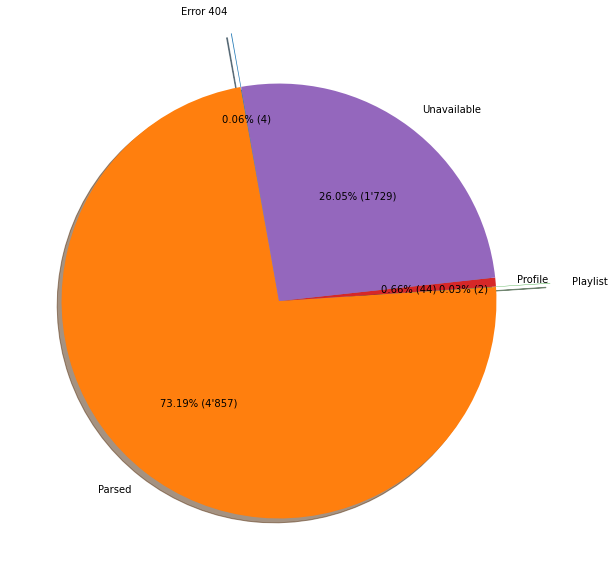

In [6]:
plt.figure(figsize=(20,10))
s = df_yt_summary['occurrency'].sum()
plt.pie(df_yt_summary['occurrency'], labels=df_yt_summary.index, shadow=True, startangle=100,
       autopct=lambda p:f'{p:.2f}% ({p*(s)/100 :,.0f})'.replace(',', '\''),
       explode = [0.25,0.0,0.25,0.0,0.0])
plt.show()

## Tracking user with type youtbe video shared
Done only for unavailbe and parsed video

In [7]:
df_url = df[df['urls'] != '[]'].copy()

df_url = ut.get_dfYt_line(df_url,df_yt.index)
df_url = df_url[df_url['yt']]

df_url

,user_screen_name,urls,yt
128,LCuratti,"[{'url': 'https://t.co/jrjZgVP1JO', 'expanded_...",True
487,CrackFriday,"[{'url': 'https://t.co/Qf1n9gOF8n', 'expanded_...",True
531,ColpoSuColpo,"[{'url': 'https://t.co/8rMiknPnzS', 'expanded_...",True
1027,Rugoso1967,"[{'url': 'https://t.co/pl89B3xxGJ', 'expanded_...",True
1141,IacobellisT,"[{'url': 'https://t.co/otlx8DwhOC', 'expanded_...",True
...,...,...,...
4050450,DiegoDan80,"[{'url': 'https://t.co/NUchV693fQ', 'expanded_...",True
4051197,Euro_comunica,"[{'url': 'https://t.co/8darAJ3QFS', 'expanded_...",True
4051372,KattInForma,"[{'url': 'https://t.co/P7DbC09hqn', 'expanded_...",True
4051446,KattInForma,"[{'url': 'https://t.co/e8oC0LSyVE', 'expanded_...",True


In [8]:
df_user_yt = pd.DataFrame(columns=['name','url','type'])

for i in df_url.index:
    user = df.at[i, 'user_screen_name']
    s = df.at[i, 'urls']
    urls = gen_ut.get_string_json(s, 'expanded_url')
    for url in urls:
        if url in df_yt.index:
            df_user_yt.loc[df_user_yt.shape[0]] = [user,url,df_yt.loc[url,'reason']]
            

df_user_yt        

,name,url,type
0,LCuratti,https://youtu.be/3_0iVnTwI58,Parsed
1,CrackFriday,https://youtu.be/8VTKaFz9ruw,Parsed
2,ColpoSuColpo,https://youtu.be/BQIo8rWYPOM,Parsed
3,Rugoso1967,https://youtu.be/YrDsCZB65ls,Parsed
4,Rugoso1967,https://youtu.be/7y5PsHQKK4k,Unavailable
...,...,...,...
20535,DiegoDan80,https://youtu.be/XEQ2-jssdFI,Parsed
20536,Euro_comunica,https://youtu.be/FoZJXSbclZA,Parsed
20537,KattInForma,https://youtu.be/6VHVvogoyTE,Parsed
20538,KattInForma,https://youtu.be/j2-Guu_no_8,Parsed


In [9]:
df_user_yt['isParsed'] = 0
df_user_yt.loc[df_user_yt['type']=='Parsed','isParsed'] = 1
df_user_yt['total'] = 1


df_user_group = df_user_yt.groupby(['name']).sum().sort_values(['total'],ascending=False)
df_user_group

,isParsed,total
name,,
IacobellisT,1438,1809
TommyBrain,1273,1613
Fedoraquattroc2,322,523
GastoneSabba,150,198
ACCEDIALSITO,116,147
...,...,...
PaoloVersa,1,1
PaoloProcopio4,1,1
PaoloPqi,1,1


Text(0.5, 1.0, 'Number of youtube video shared ')

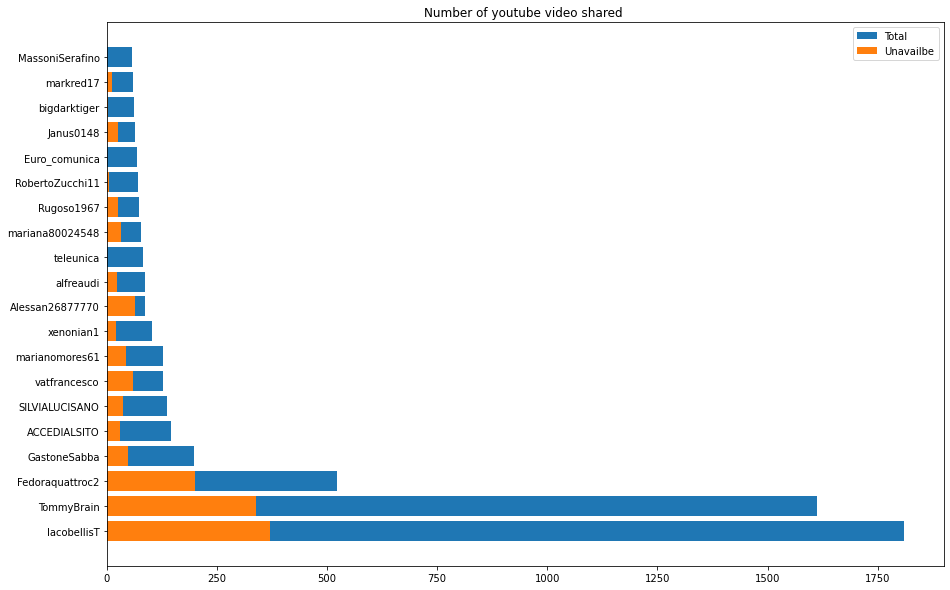

In [10]:
plt.figure(figsize=(15,10))
plt.barh(df_user_group.head(20).index,df_user_group.head(20).total,label='Total')
plt.barh(df_user_group.head(20).index,df_user_group.head(20).total-df_user_group.head(20).isParsed
        ,label='Unavailbe')
plt.legend()
plt.title('Number of youtube video shared ')